<a href="https://colab.research.google.com/github/December04/MachineLearningProgramming/blob/main/Week09/Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [67]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv")
data = df['S4248SM144NCEN'].values.reshape(-1, 1)

In [68]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [69]:
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [70]:
def create_dataset(dataset, window):
    X, y = [], []
    for i in range(len(dataset) - window):
        X.append(dataset[i:i+window])
        y.append(dataset[i+window])
    return np.array(X), np.array(y)

In [71]:
window = 20
X_train, y_train = create_dataset(train_data, window)
X_test, y_test = create_dataset(test_data, window)

In [72]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [73]:
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(window, 1)),
    tf.keras.layers.Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')

rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=8,
                            validation_data=(X_test, y_test), verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0451 - val_loss: 0.0787
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - val_loss: 0.0209
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0211
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 0.0173
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6556e-04 - val_loss: 0.0124
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 0.0088
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 0.0092
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6377e-04 - val_loss: 0.0056
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1914e-04 - val_loss: 0.0135
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.3171e-04 - val_loss: 0.0129
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4908e-04 - val_loss: 0.0113
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.227

In [74]:
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window, 1)),
    tf.keras.layers.Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=8,
                              validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0304 - val_loss: 0.0315
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053 - val_loss: 0.0156
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - val_loss: 0.0157
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - val_loss: 0.0159
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - val_loss: 0.0151
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053 - val_loss: 0.0196
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0057 - val_loss: 0.0158
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - val_loss: 0.0151
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - val_loss: 0.0149
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0063 - val_loss: 0.0177
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0057 - val_loss: 0.0168
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0050 - val_l

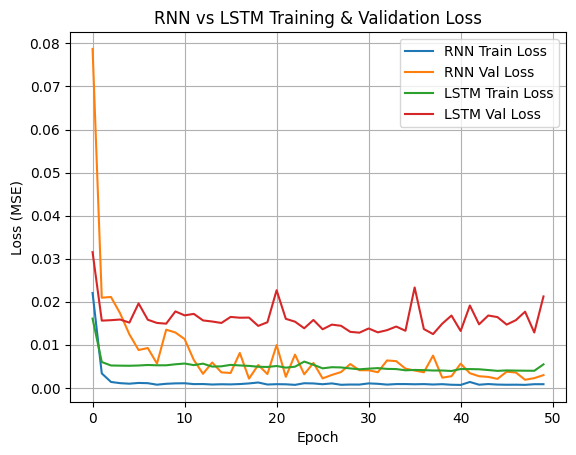

In [75]:
plt.plot(rnn_history.history['loss'], label='RNN Train Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Val Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Val Loss')
plt.title('RNN vs LSTM Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
rnn_pred = rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


In [77]:
rnn_pred_inversed = scaler.inverse_transform(rnn_pred)
lstm_pred_inversed = scaler.inverse_transform(lstm_pred)
y_test_inversed = scaler.inverse_transform(y_test)

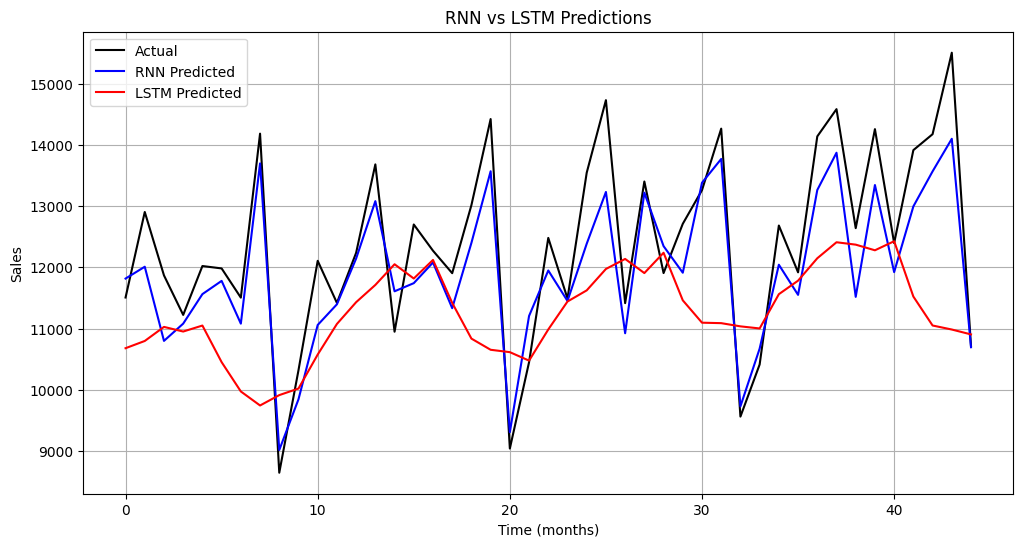

In [78]:
plt.figure(figsize=(12,6))
plt.plot(y_test_inversed, label='Actual', color='black')
plt.plot(rnn_pred_inversed, label='RNN Predicted', color='blue')
plt.plot(lstm_pred_inversed, label='LSTM Predicted', color='red')
plt.title('RNN vs LSTM Predictions')
plt.xlabel('Time (months)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()